In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude cominbations. 
lats = np.random.uniform(-90, 90, size=2500)
lngs = np.random.uniform(-180, 180, size=2500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Import citipy modeule
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city name is unique, we add it to the list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count
len(cities)

866

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d443bfceb0b31632fd9a937cd0278716


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#  Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 18 | bluff
Processing Record 2 of Set 18 | portland
Processing Record 3 of Set 18 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 18 | avarua
Processing Record 5 of Set 18 | ankara
Processing Record 6 of Set 18 | butaritari
Processing Record 7 of Set 18 | punta arenas
Processing Record 8 of Set 18 | nishihara
Processing Record 9 of Set 18 | sao filipe
Processing Record 10 of Set 18 | busselton
Processing Record 11 of Set 18 | buala
Processing Record 12 of Set 18 | clyde river
Processing Record 13 of Set 18 | glenwood springs
Processing Record 14 of Set 18 | namibe
Processing Record 15 of Set 18 | hermanus
Processing Record 16 of Set 18 | ponta do sol
Processing Record 17 of Set 18 | hobart
Processing Record 18 of Set 18 | ketchikan
Processing Record 19 of Set 18 | atuona
Processing Record 20 of Set 18 | ushuaia
Processing Record 21 of Set 18 | dzhebariki-khaya
Processing Record

Processing Record 30 of Set 21 | ahipara
Processing Record 31 of Set 21 | karauzyak
City not found. Skipping...
Processing Record 32 of Set 21 | puerto ayacucho
Processing Record 33 of Set 21 | belyy yar
Processing Record 34 of Set 21 | clarksville
Processing Record 35 of Set 21 | kyaukse
Processing Record 36 of Set 21 | hoganas
Processing Record 37 of Set 21 | puerto ayora
Processing Record 38 of Set 21 | husavik
Processing Record 39 of Set 21 | qaanaaq
Processing Record 40 of Set 21 | santiago del estero
Processing Record 41 of Set 21 | ponta delgada
Processing Record 42 of Set 21 | doctor arroyo
Processing Record 43 of Set 21 | tubuala
Processing Record 44 of Set 21 | norman wells
Processing Record 45 of Set 21 | sharjah
Processing Record 46 of Set 21 | berlevag
Processing Record 47 of Set 21 | gazanjyk
Processing Record 48 of Set 21 | codrington
Processing Record 49 of Set 21 | coquimbo
Processing Record 50 of Set 21 | fandriana
Processing Record 1 of Set 22 | mount isa
Processing 

Processing Record 16 of Set 25 | parras
City not found. Skipping...
Processing Record 17 of Set 25 | saint-paul
Processing Record 18 of Set 25 | marsa matruh
Processing Record 19 of Set 25 | kracheh
City not found. Skipping...
Processing Record 20 of Set 25 | roma
Processing Record 21 of Set 25 | kieta
Processing Record 22 of Set 25 | guiberoua
Processing Record 23 of Set 25 | tinsukia
Processing Record 24 of Set 25 | anadyr
Processing Record 25 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 26 of Set 25 | shetpe
Processing Record 27 of Set 25 | luanshya
Processing Record 28 of Set 25 | yanchukan
City not found. Skipping...
Processing Record 29 of Set 25 | labrea
Processing Record 30 of Set 25 | tornio
Processing Record 31 of Set 25 | padang
Processing Record 32 of Set 25 | nchelenge
Processing Record 33 of Set 25 | puksoozero
Processing Record 34 of Set 25 | fukue
Processing Record 35 of Set 25 | tessalit
Processing Record 36 of Set 25 | chai badan
Processing Re

City not found. Skipping...
Processing Record 2 of Set 29 | athabasca
Processing Record 3 of Set 29 | manicore
Processing Record 4 of Set 29 | magistralnyy
Processing Record 5 of Set 29 | sarh
Processing Record 6 of Set 29 | warrington
Processing Record 7 of Set 29 | saint-joseph
Processing Record 8 of Set 29 | borovskoy
Processing Record 9 of Set 29 | seoul
Processing Record 10 of Set 29 | cacu
Processing Record 11 of Set 29 | guangyuan
Processing Record 12 of Set 29 | boguchany
Processing Record 13 of Set 29 | ayolas
Processing Record 14 of Set 29 | koslan
Processing Record 15 of Set 29 | muscatine
Processing Record 16 of Set 29 | richards bay
Processing Record 17 of Set 29 | chumikan
Processing Record 18 of Set 29 | tres de maio
Processing Record 19 of Set 29 | uvira
Processing Record 20 of Set 29 | puerto escondido
Processing Record 21 of Set 29 | biltine
Processing Record 22 of Set 29 | taoudenni
Processing Record 23 of Set 29 | upata
Processing Record 24 of Set 29 | mahajanga
Pro

Processing Record 36 of Set 32 | kuala pilah
Processing Record 37 of Set 32 | zyryanka
Processing Record 38 of Set 32 | porangatu
Processing Record 39 of Set 32 | nadapuram
Processing Record 40 of Set 32 | torres
Processing Record 41 of Set 32 | robore
Processing Record 42 of Set 32 | ippy
Processing Record 43 of Set 32 | sovetsk
Processing Record 44 of Set 32 | takab
Processing Record 45 of Set 32 | coahuayana
Processing Record 46 of Set 32 | aqtobe
Processing Record 47 of Set 32 | christchurch
Processing Record 48 of Set 32 | faanui
Processing Record 49 of Set 32 | ambon
Processing Record 50 of Set 32 | labuhan
Processing Record 1 of Set 33 | canitas
City not found. Skipping...
Processing Record 2 of Set 33 | vuktyl
Processing Record 3 of Set 33 | ostrovnoy
Processing Record 4 of Set 33 | topchikha
Processing Record 5 of Set 33 | srimushnam
Processing Record 6 of Set 33 | molokovo
Processing Record 7 of Set 33 | gusino
Processing Record 8 of Set 33 | swindon
Processing Record 9 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,44.47,83,100,6.46,NZ,2022-10-25 15:26:59
1,Portland,45.5234,-122.6762,50.74,94,75,7.00,US,2022-10-25 15:25:07
2,Avarua,-21.2078,-159.7750,71.65,68,40,9.22,CK,2022-10-25 15:27:00
3,Ankara,39.9199,32.8543,62.20,41,0,1.14,TR,2022-10-25 15:27:00
4,Butaritari,3.0707,172.7902,80.87,78,63,4.68,KI,2022-10-25 15:27:01
5,Punta Arenas,-53.1500,-70.9167,48.31,61,100,12.66,CL,2022-10-25 15:22:43
6,Nishihara,26.1842,127.7558,69.08,56,75,13.80,JP,2022-10-25 15:27:02
7,Sao Filipe,14.8961,-24.4956,78.73,76,4,7.11,CV,2022-10-25 15:27:03
8,Busselton,-33.6500,115.3333,51.26,81,0,5.61,AU,2022-10-25 15:27:04
9,Buala,-8.1450,159.5921,79.25,82,2,3.60,SB,2022-10-25 15:27:05


In [13]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-10-25 15:26:59,-46.6000,168.3333,44.47,83,100,6.46
1,Portland,US,2022-10-25 15:25:07,45.5234,-122.6762,50.74,94,75,7.00
2,Avarua,CK,2022-10-25 15:27:00,-21.2078,-159.7750,71.65,68,40,9.22
3,Ankara,TR,2022-10-25 15:27:00,39.9199,32.8543,62.20,41,0,1.14
4,Butaritari,KI,2022-10-25 15:27:01,3.0707,172.7902,80.87,78,63,4.68
5,Punta Arenas,CL,2022-10-25 15:22:43,-53.1500,-70.9167,48.31,61,100,12.66
6,Nishihara,JP,2022-10-25 15:27:02,26.1842,127.7558,69.08,56,75,13.80
7,Sao Filipe,CV,2022-10-25 15:27:03,14.8961,-24.4956,78.73,76,4,7.11
8,Busselton,AU,2022-10-25 15:27:04,-33.6500,115.3333,51.26,81,0,5.61
9,Buala,SB,2022-10-25 15:27:05,-8.1450,159.5921,79.25,82,2,3.60


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

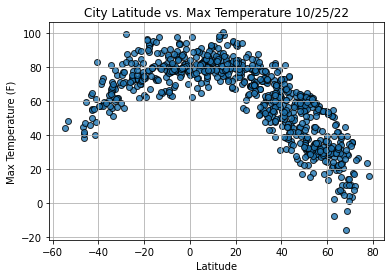

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

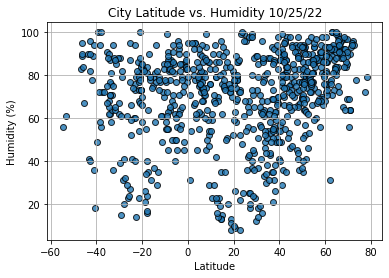

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


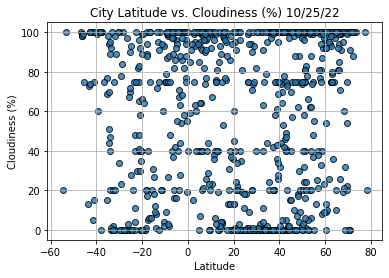

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

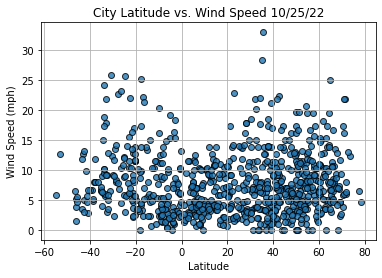

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Portland,US,2022-10-25 15:25:07,45.5234,-122.6762,50.74,94,75,7.00
3,Ankara,TR,2022-10-25 15:27:00,39.9199,32.8543,62.20,41,0,1.14
4,Butaritari,KI,2022-10-25 15:27:01,3.0707,172.7902,80.87,78,63,4.68
6,Nishihara,JP,2022-10-25 15:27:02,26.1842,127.7558,69.08,56,75,13.80
7,Sao Filipe,CV,2022-10-25 15:27:03,14.8961,-24.4956,78.73,76,4,7.11


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

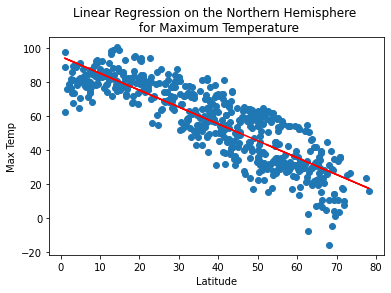

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,-40))

plt.show()

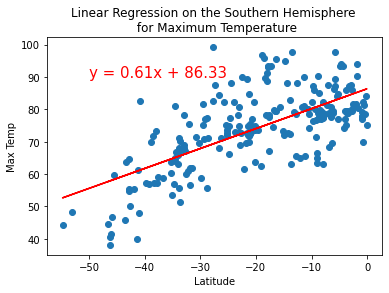

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

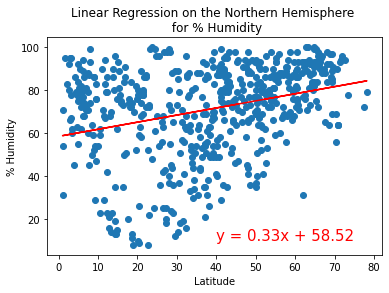

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

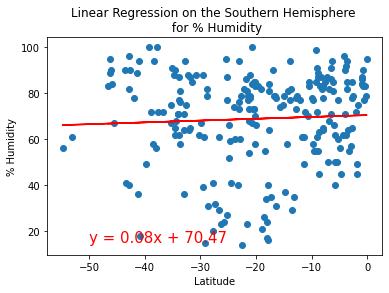

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

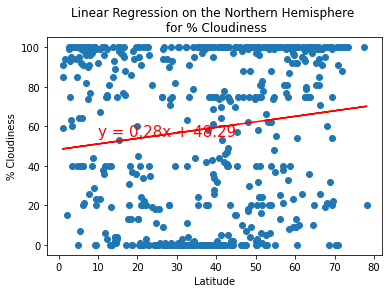

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

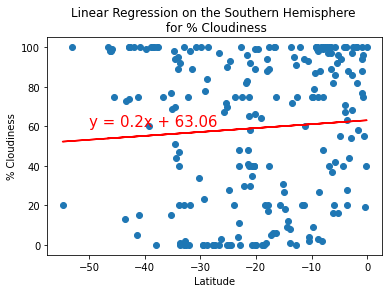

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

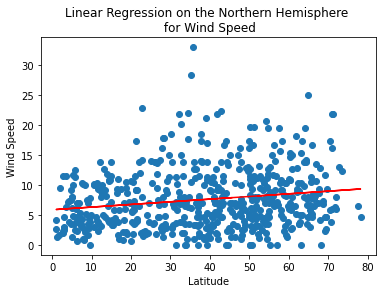

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

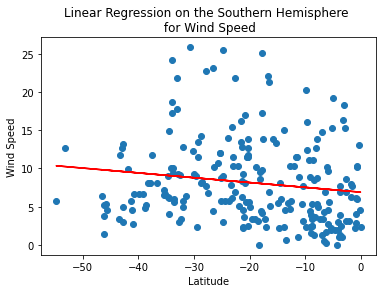

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))